In [119]:
from imports import *

In [14]:
# https://data.worldbank.org/indicator/EN.ATM.CO2E.PC?type=shaded&view=map
ROOT = Path('CO2 emissions (metric tons per capita)')

In [15]:
ROOT.ls()

['Metadata_Indicator_API_EN.ATM.CO2E.PC_DS2_en_csv_v2_612637.csv',
 'API_EN.ATM.CO2E.PC_DS2_en_csv_v2_612637.csv',
 'Metadata_Country_API_EN.ATM.CO2E.PC_DS2_en_csv_v2_612637.csv']

In [69]:
# co2 per capita
df_co2_pc = pd.read_csv(ROOT/'API_EN.ATM.CO2E.PC_DS2_en_csv_v2_612637.csv', skiprows = 3)
df_co2_pc.drop(columns = 'Unnamed: 64', inplace=True)

In [70]:
df_co2_pc.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,24.670529,24.507516,13.157722,8.353561,8.410064,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,...,0.289988,0.406424,0.345149,0.310341,0.293946,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210531,0.202737,0.213560,0.205891,...,1.244092,1.252681,1.330219,1.253776,1.290307,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,...,1.578574,1.803715,1.692908,1.749211,1.978763,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,6.122595,5.867410,5.916884,5.901775,5.832906,NaN,NaN,NaN,NaN,NaN


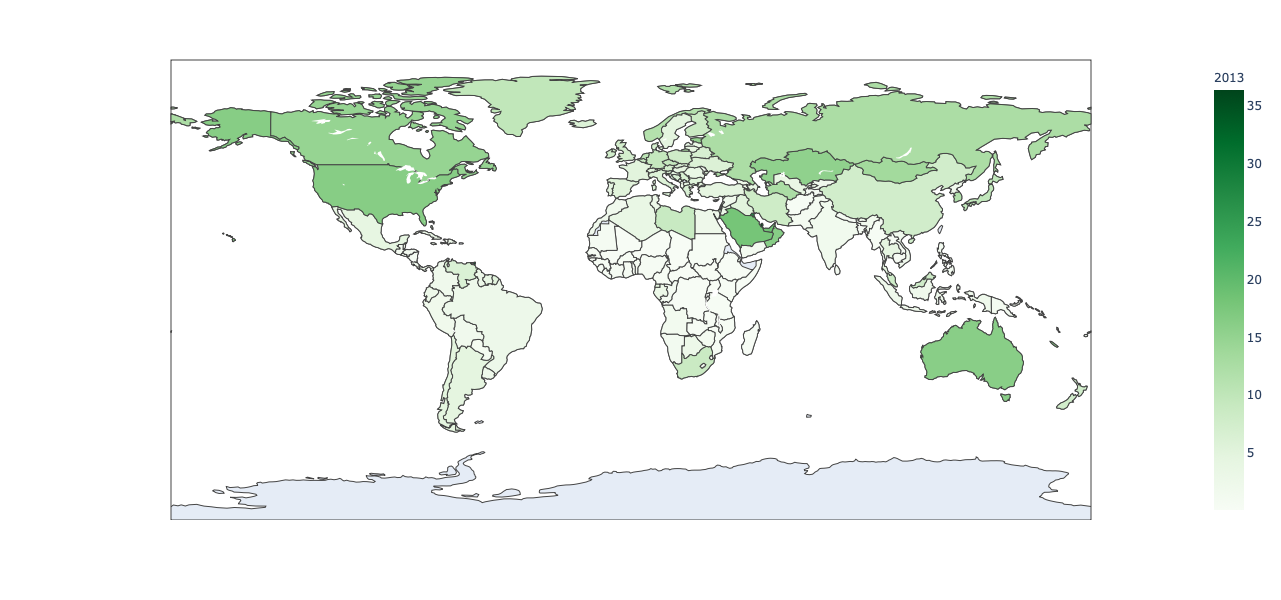

In [87]:
# https://plot.ly/python/choropleth-maps/
px.choropleth(df_co2_pc, locations="Country Code",
                    color="2013", # lifeExp is a column of gapminder
                    hover_name="Country Name", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Greens)

In [92]:
??px.choropleth

Signature:
px.choropleth(
    data_frame=None,
    lat=None,
    lon=None,
    locations=None,
    locationmode=None,
    color=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    size=None,
    animation_frame=None,
    animation_group=None,
    category_orders={},
    labels={},
    color_continuous_scale=None,
    range_color=None,
    color_continuous_midpoint=None,
    size_max=None,
    projection=None,
    scope=None,
    center=None,
    title=None,
    template=None,
    width=None,
    height=None,
)
Docstring:
    In a choropleth map, each row of `data_frame` is represented by a colored
    region mark on a map.
    
Parameters
----------
data_frame: DataFrame or array-like or dict
    This argument needs to be passed for column names (and not keyword names)
    to be used. Array-like and dict are tranformed internally to a pandas
    DataFrame.
lat: str or int or Series or array-like
    Either a name of a column in `data_frame`, or a pandas Series or


In [79]:
# https://plot.ly/python/bubble-maps/
df_co2_pc_year_pivoted =  df_co2_pc.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
        var_name="Year", 
        value_name="Co2 Per Capita")
df_co2_pc_year_pivoted.fillna(0, inplace=True)

In [93]:
# https://plot.ly/python/choropleth-maps/
px.choropleth(df_co2_pc_year_pivoted, locations='Country Code',
                     hover_name="Country Name", color="Co2 Per Capita",
                     animation_frame="Year",
                     projection="natural earth", color_continuous_scale=px.colors.diverging.Earth)